<a href="https://colab.research.google.com/github/mohammedradman1/Data_analytics/blob/main/Clustering_Articles_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Articles: Introduction

This project aims to use the course studied clustering models that have been presented. <br/>
The used dataset is articles dataset which consists of the following:
1. Business Dataset: 2000 articles
2. Education Dataset: 2000 articles
3. Entertainment Dataset: 2000 article
4. Sports Dataset: 2000 article
5. Technology Dataset: 2000 article

These datasets add up to 10,000 articles that we can divided using stratified random sampling to create a smaller dataset consisting of a thousand article.
<br/>
We will use the following clustering models to test them on the datasets:
1. K-means
2. AgglomerativeClustering
3. DBSCAN
4. SpectralClustering

# Data Importing

In this section, we import the data and create two datasets `large and small`.

In [1]:
#Importing needed libraries
import pandas as pd

In [2]:
# load the files
!wget "https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/business_data.csv";
!wget "https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/education_data.csv";
!wget "https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/entertainment_data.csv";
!wget "https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/sports_data.csv";
!wget "https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/technology_data.csv";

--2024-05-19 02:01:11--  https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/business_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4104876 (3.9M) [text/plain]
Saving to: ‘business_data.csv’

business_data.csv   100%[===================>]   3.91M  --.-KB/s    in 0.05s   

2024-05-19 02:01:11 (73.8 MB/s) - ‘business_data.csv’ saved [4104876/4104876]

--2024-05-19 02:01:11--  https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/education_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP r

In [35]:
# Reading dataset files
business_df = pd.read_csv("business_data.csv")
education_df = pd.read_csv("education_data.csv")
entertainment_df = pd.read_csv("entertainment_data.csv")
sports_df = pd.read_csv("sports_data.csv")
technology_df = pd.read_csv("technology_data.csv")

we want to create two datasets of the five clusters.

In [36]:
# We create a small dataset
df_small = pd.concat([business_df.sample(100), education_df.sample(100),
                      entertainment_df.sample(100), sports_df.sample(100),
                      technology_df.sample(100)])
df_small.reset_index(inplace=True) # resetting index
df_small.head(3)

,index,headlines,description,content,url,category
0,327,Serum Institute CEO Adar Poonawalla buys Londo...,"According to ‘The Financial Times', the Poonaw...",Serum Institute of India (SII) CEO Adar Poonaw...,https://indianexpress.com/article/business/ser...,business
1,1573,"Nirma, two others in race to buy Glenmark Life","Originally, five bidders were in the race to b...","Three bidders – ChrysCapital, Nirma and Sekhma...",https://indianexpress.com/article/business/nir...,business
2,830,Delhi HC asks Go First airline to give lessors...,The National Company Law Tribunal On May 10 pl...,"In an interim order on Thursday, the Delhi Hig...",https://indianexpress.com/article/business/avi...,business


In [37]:
# Creating the large dataset
df_big = pd.concat([business_df, education_df,
                      entertainment_df, sports_df,
                      technology_df])
df_big.reset_index(inplace=True) # resetting index
df_big.head(3)

,index,headlines,description,content,url,category
0,0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business
1,1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business
2,2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business


# Data Exploration

We notice that the data is already clustered and labelled. However, we will remove the label and only cluster the articles using only two columns which are:
  1. Description Column.
  2. Content Column. <br/>

In the following, we will explore the data visually to inspect it and get an understanding of it.

In [38]:
# Print the count of the different labels
import matplotlib.pyplot as plt

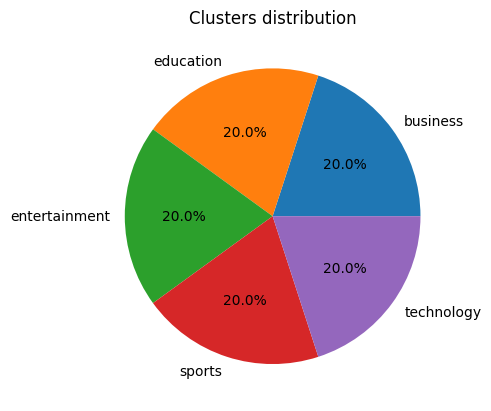

In [39]:
# Plotting the disrtributions of each class
values = df_big['category'].value_counts();
categories = df_big['category'].unique();

plt.pie(values, labels = categories, autopct='%1.1f%%')
plt.title("Clusters distribution")
plt.show()

(array([2000.,    0., 2000.,    0.,    0., 2000.,    0., 2000.,    0.,
        2000.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

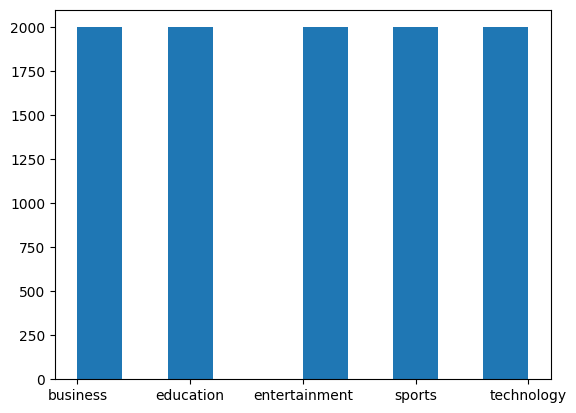

In [40]:
# plotting the distribution of the dataset labels
plt.hist(df_big["category"])

# Data Preprocessing

In this section, we preprocess the data to prepare it to be fed into the clustering models. We will perform the following:
1. Remove stop words.
2. Vectorize the data (feature extraction).


In [42]:
# Creating a copy of the data of the two used tables
small_df_copy = df_small[["headlines","description","content","category"]]
small_df_copy.head(3)

,headlines,description,content
0,Serum Institute CEO Adar Poonawalla buys Londo...,"According to ‘The Financial Times', the Poonaw...",Serum Institute of India (SII) CEO Adar Poonaw...
1,"Nirma, two others in race to buy Glenmark Life","Originally, five bidders were in the race to b...","Three bidders – ChrysCapital, Nirma and Sekhma..."
2,Delhi HC asks Go First airline to give lessors...,The National Company Law Tribunal On May 10 pl...,"In an interim order on Thursday, the Delhi Hig..."


In [43]:
# creating a copy of the large dataset
big_df_copy = df_big[["headlines","description","content","category" ]]
big_df_copy.head(3)

,headlines,description,content
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ..."
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...


In [51]:
# applying lowercase to each column in the dataset
for column in small_df_copy.columns:
  small_df_copy[column] = small_df_copy[column].str.lower()

<ipython-input-51-112cbb3d17fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy[column] = small_df_copy[column].str.lower()


In [52]:
# verify conversion to small
small_df_copy.head(3)

,headlines,description,content
0,serum institute ceo adar poonawalla buys londo...,"according to ‘the financial times', the poonaw...",serum institute of india (sii) ceo adar poonaw...
1,"nirma, two others in race to buy glenmark life","originally, five bidders were in the race to b...","three bidders – chryscapital, nirma and sekhma..."
2,delhi hc asks go first airline to give lessors...,the national company law tribunal on may 10 pl...,"in an interim order on thursday, the delhi hig..."


In [56]:
# Converting big dataset to lowercase
for column in big_df_copy.columns:
  big_df_copy[column] = big_df_copy[column].apply(str.lower)

big_df_copy.head(3)

<ipython-input-56-fe484a7cfd52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy[column] = big_df_copy[column].apply(str.lower)
<ipython-input-56-fe484a7cfd52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy[column] = big_df_copy[column].apply(str.lower)
<ipython-input-56-fe484a7cfd52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,headlines,description,content
0,nirmala sitharaman to equal morarji desai’s re...,with the presentation of the interim budget on...,"sitharaman, the first full-time woman finance ..."
1,"‘will densify network, want to be at least no....","'in terms of market share, we aim to double it...",the merger of tata group’s budget airlines air...
2,air india group to induct an aircraft every si...,air india currently has 117 operational aircra...,the air india group plans to induct one aircra...


## Stopwords removal

In [57]:
# import the stopwords corpus
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
# Defining the language of the stop words
stop_words = stopwords.words("english")

In [59]:
# removing stop words
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in stop_words] )

In [65]:
# Remove stopwords from small dataset
for column in small_df_copy.columns:
  small_df_copy[column] = small_df_copy[column].apply(remove_stopwords)

small_df_copy.head(3)

<ipython-input-65-a9b85f80428e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy[column] = small_df_copy[column].apply(remove_stopwords);
<ipython-input-65-a9b85f80428e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy[column] = small_df_copy[column].apply(remove_stopwords);
<ipython-input-65-a9b85f80428e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,headlines,description,content
0,serum institute ceo adar poonawalla buys londo...,"according ‘the financial times', poonawalla fa...",serum institute india (sii) ceo adar poonawall...
1,"nirma, two others race buy glenmark life","originally, five bidders race buy company repo...","three bidders – chryscapital, nirma sekhmat ph..."
2,delhi hc asks go first airline give lessors ac...,national company law tribunal may 10 placed mo...,"interim order thursday, delhi high court issue..."


In [62]:
# Remove stopwords from big dataset
for column in big_df_copy.columns:
  big_df_copy[column] = big_df_copy[column].apply(remove_stopwords)

big_df_copy.head(3)

<ipython-input-62-4bf43434803d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy[column] = big_df_copy[column].apply(remove_stopwords)
<ipython-input-62-4bf43434803d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy[column] = big_df_copy[column].apply(remove_stopwords)
<ipython-input-62-4bf43434803d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,headlines,description,content
0,nirmala sitharaman equal morarji desai’s recor...,"presentation interim budget february 1, nirmal...","sitharaman, first full-time woman finance mini..."
1,"‘will densify network, want least no. 2 city p...","'in terms market share, aim double 2028 segmen...",merger tata group’s budget airlines air india ...
2,air india group induct aircraft every six days...,air india currently 117 operational aircraft f...,air india group plans induct one aircraft ever...


## Lemmatizating Text

In this part we perform lemmatizing.

In [71]:
# We download the package
!pip install nltk
!python -m nltk.downloader wordnet

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [68]:
# Import necessary libraries: get wordNetLemmatizer
from nltk.stem import WordNetLemmatizer

In [67]:
# Define a lemmatizer
lemmatizer = WordNetLemmatizer()

In [69]:
# Define a function to lemmatize the data
def lemmatize_text(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [72]:
# Applying lemmatization for small dataset
# Remove stopwords from small dataset
for column in small_df_copy.columns:
  small_df_copy[column] = small_df_copy[column].apply(lemmatize_text)

small_df_copy.head(3)

<ipython-input-72-7cbcdb8662df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy[column] = small_df_copy[column].apply(lemmatize_text)
<ipython-input-72-7cbcdb8662df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy[column] = small_df_copy[column].apply(lemmatize_text)
<ipython-input-72-7cbcdb8662df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,headlines,description,content
0,serum institute ceo adar poonawalla buy london...,"according ‘the financial times', poonawalla fa...",serum institute india (sii) ceo adar poonawall...
1,"nirma, two others race buy glenmark life","originally, five bidder race buy company repor...","three bidder – chryscapital, nirma sekhmat pha..."
2,delhi hc asks go first airline give lessor acc...,national company law tribunal may 10 placed mo...,"interim order thursday, delhi high court issue..."


In [73]:
# Applying lemmatization for big dataset
# Remove stopwords from big dataset
for column in big_df_copy.columns:
  big_df_copy[column] = big_df_copy[column].apply(lemmatize_text)

big_df_copy.head(3)

<ipython-input-73-f9158237283c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy[column] = big_df_copy[column].apply(lemmatize_text)
<ipython-input-73-f9158237283c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy[column] = big_df_copy[column].apply(lemmatize_text)
<ipython-input-73-f9158237283c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,headlines,description,content
0,nirmala sitharaman equal morarji desai’s recor...,"presentation interim budget february 1, nirmal...","sitharaman, first full-time woman finance mini..."
1,"‘will densify network, want least no. 2 city p...","'in term market share, aim double 2028 segment...",merger tata group’s budget airline air india e...
2,air india group induct aircraft every six day ...,air india currently 117 operational aircraft f...,air india group plan induct one aircraft every...


## Feature Extraction (Text Vectorization)

### Combining columns

We combine the three columns together

In [74]:
# combining columns in small dataset
small_df_copy["combined_text"] = small_df_copy["headlines"] +" "+ small_df_copy["description"]+" "+small_df_copy["content"]
# combining columns in big dataset
big_df_copy["combined_text"] = big_df_copy["headlines"] +" "+ big_df_copy["description"]+" "+ big_df_copy["content"]


<ipython-input-74-3032fd1ea570>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy["combined_text"] = small_df_copy["headlines"] +" "+ small_df_copy["description"]+" "+small_df_copy["content"]
<ipython-input-74-3032fd1ea570>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy["combined_text"] = big_df_copy["headlines"] +" "+ big_df_copy["description"]+" "+ big_df_copy["content"]


In [75]:
# check for combining process
small_df_copy.head(3)

,headlines,description,content,combined_text
0,serum institute ceo adar poonawalla buy london...,"according ‘the financial times', poonawalla fa...",serum institute india (sii) ceo adar poonawall...,serum institute ceo adar poonawalla buy london...
1,"nirma, two others race buy glenmark life","originally, five bidder race buy company repor...","three bidder – chryscapital, nirma sekhmat pha...","nirma, two others race buy glenmark life origi..."
2,delhi hc asks go first airline give lessor acc...,national company law tribunal may 10 placed mo...,"interim order thursday, delhi high court issue...",delhi hc asks go first airline give lessor acc...


In [76]:
# check for combining process
big_df_copy.head(3)

,headlines,description,content,combined_text
0,nirmala sitharaman equal morarji desai’s recor...,"presentation interim budget february 1, nirmal...","sitharaman, first full-time woman finance mini...",nirmala sitharaman equal morarji desai’s recor...
1,"‘will densify network, want least no. 2 city p...","'in term market share, aim double 2028 segment...",merger tata group’s budget airline air india e...,"‘will densify network, want least no. 2 city p..."
2,air india group induct aircraft every six day ...,air india currently 117 operational aircraft f...,air india group plan induct one aircraft every...,air india group induct aircraft every six day ...


### TF-IDF Vectorization

In [96]:
# Import Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
# vectorizing small dataset
vectorizer = TfidfVectorizer(max_features=1000)

In [98]:
# Converting texts to vectors
small_df_features = vectorizer.fit_transform(small_df_copy["combined_text"])

In [100]:
# Converting texts to vectors
big_df_features = vectorizer.fit_transform(big_df_copy["combined_text"])

# K-Means Clustering Model

We perform K-means clustering on the features above.

In [116]:
# Import the clustering model
from sklearn.cluster import KMeans
# importing Single Vector Decomposition to reduce dimensionality
from sklearn.decomposition import TruncatedSVD
# Import matplot to draw
import matplotlib.pyplot as plt
# importing evaluation metrics silhouettee and ch_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score



## Small Dataset

In [109]:
# Create Clustering for small dataset
kmeans_small_df = KMeans( n_clusters = 5)
kmeans_small_df.fit(small_df_features)
small_df_copy ["cluster"] = kmeans_small_df.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-109-d9b22cf9c354>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy ["cluster"] = kmeans_small_df.labels_


In [110]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(small_df_features, small_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.030839701219150275


In [121]:
# evaluating the ch_score for the small dataset
# to allow it to be used in the calinski_harabasz_score as it doesn't accept sparse
dense_small_df_features = small_df_features.toarray()

ch_score = calinski_harabasz_score(dense_small_df_features, small_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)


Calinski-Harabasz Score: 8.94994093238531


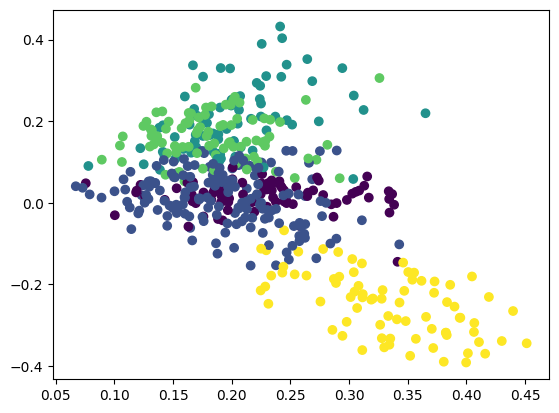

In [111]:
# Create a TruncatedSVD instance with the desired number of components
svd = TruncatedSVD(n_components=4)

# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(small_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=small_df_copy["cluster"])
plt.show()

## Big Dataset

In [112]:
# Create Clustering for big dataset
kmeans_big_df = KMeans( n_clusters = 5)
kmeans_big_df.fit(big_df_features)
big_df_copy ["cluster"] = kmeans_big_df.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-112-72ee31e3a103>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy ["cluster"] = kmeans_big_df.labels_


In [113]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(big_df_features, big_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.03303713971101188


In [118]:
# evaluating the ch_score
dense_big_df_features = big_df_features.toarray()

ch_score = calinski_harabasz_score(dense_big_df_features, big_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)


Calinski-Harabasz Score: 172.16808637009652


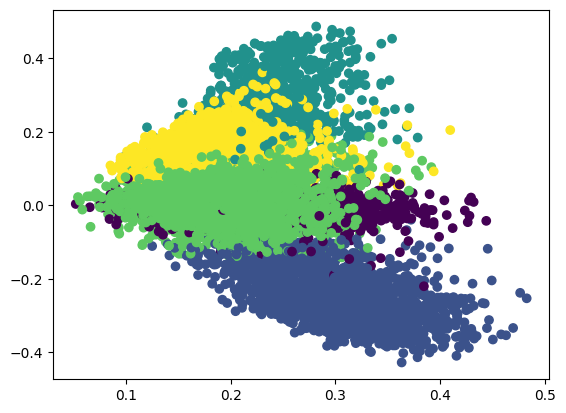

In [119]:
# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(big_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=big_df_copy["cluster"])
plt.show()


# AgglomerativeClustering


In [123]:
# import the model
from sklearn.cluster import AgglomerativeClustering


## Small Dataset

In [130]:
# Define the linkage method (ward is a common choice) and distance metric
clustering = AgglomerativeClustering(n_clusters=5, linkage="average", affinity="cosine")
clustering.fit(small_df_features.toarray())

small_df_copy["cluster"] = clustering.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-130-b271b43a88ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy["cluster"] = clustering.labels_


In [131]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(small_df_features, small_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.026084721211988304


In [132]:
# evaluating the ch_score for the small dataset
# to allow it to be used in the calinski_harabasz_score as it doesn't accept sparse
dense_small_df_features = small_df_features.toarray()

ch_score = calinski_harabasz_score(dense_small_df_features, small_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)


Calinski-Harabasz Score: 6.9859890447143265


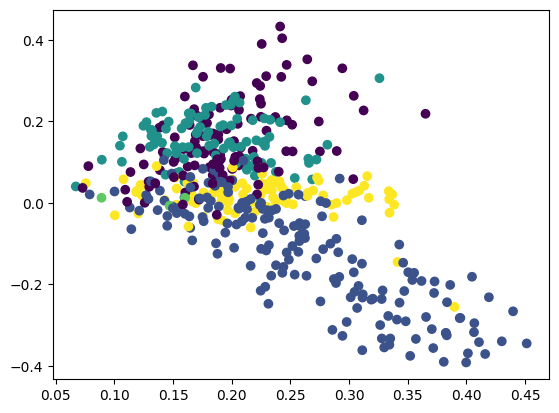

In [133]:
# Create a TruncatedSVD instance with the desired number of components
svd = TruncatedSVD(n_components=4)

# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(small_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=small_df_copy["cluster"])
plt.show()

## Big Dataset

In [134]:
# Define the linkage method (ward is a common choice) and distance metric
clustering = AgglomerativeClustering(n_clusters=5, linkage="average", affinity="cosine")
clustering.fit(big_df_features.toarray())

big_df_copy["cluster"] = clustering.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-134-9b311d8f16a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy["cluster"] = clustering.labels_


In [135]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(big_df_features, big_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.0241790620716492


In [136]:
# evaluating the ch_score
dense_big_df_features = big_df_features.toarray()

ch_score = calinski_harabasz_score(dense_big_df_features, big_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)


Calinski-Harabasz Score: 111.72055465540028


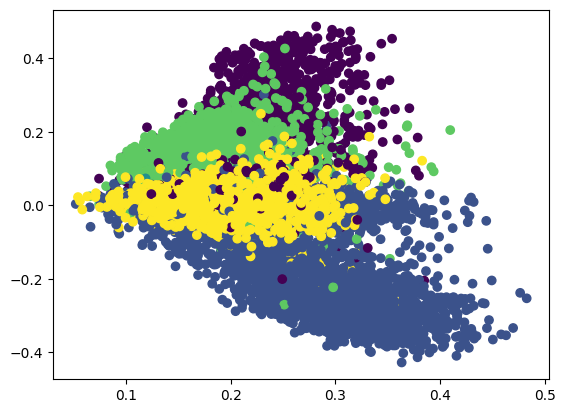

In [137]:
# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(big_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=big_df_copy["cluster"])
plt.show()


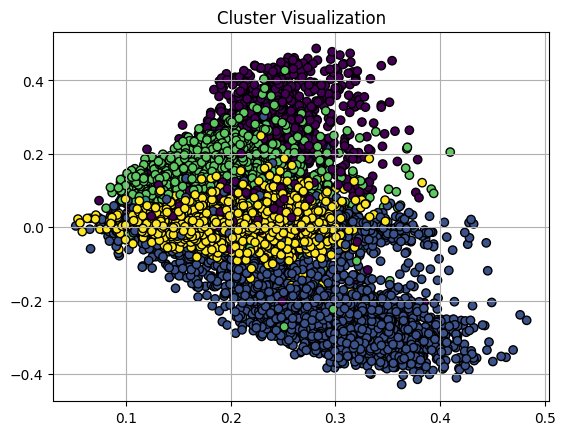

In [142]:
# Define a color list for the clusters
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Adjust the color list as needed

# Scatter plot with custom colors
import matplotlib.pyplot as plt

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=big_df_copy["cluster"], cmap='viridis', edgecolors='k')  # Using viridis colormap for visual appeal

plt.title('Cluster Visualization')
plt.grid(True)
plt.show()


# DBSCAN

In [144]:
# Import the clustering model
from sklearn.cluster import DBSCAN
import numpy as np

## Small Dataset

In [156]:
# Define DBSCAN parameters (adjust eps and min_samples as needed)
dbscan = DBSCAN(eps=0.002, min_samples=50)
dbscan.fit(small_df_features)

small_df_copy["cluster"] = dbscan.labels_

# # Handle noise points (optional)
# noise_indices = np.where(dbscan.labels_ == -1)[0]
# small_df_copy.drop(noise_indices, inplace=True)  # Remove noise points if desired


<ipython-input-156-4751f2417a11>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy["cluster"] = dbscan.labels_


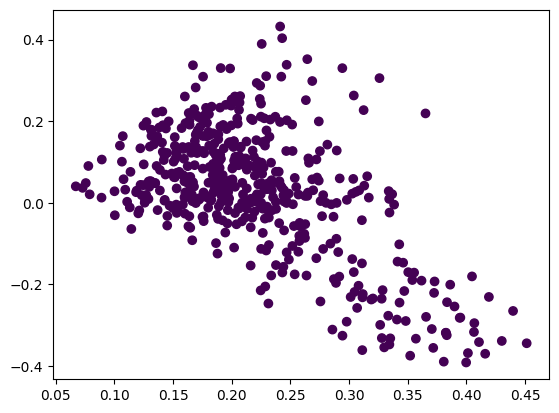

In [157]:
# Create a TruncatedSVD instance with the desired number of components
svd = TruncatedSVD(n_components=4)

# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(small_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=small_df_copy["cluster"])
plt.show()

# SpectralClustering

In [159]:
# Import the model
from sklearn.cluster import SpectralClustering

## Small Dataset

In [160]:
# Define the number of clusters
spectral = SpectralClustering(n_clusters=5, random_state=0)  # Set a random state for reproducibility
spectral.fit(small_df_features)

small_df_copy["cluster"] = spectral.labels_


<ipython-input-160-2b12826764ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy["cluster"] = spectral.labels_


In [162]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(small_df_features, small_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.028781932086005796


In [163]:
# evaluating the ch_score for the small dataset
# to allow it to be used in the calinski_harabasz_score as it doesn't accept sparse
dense_small_df_features = small_df_features.toarray()

ch_score = calinski_harabasz_score(dense_small_df_features, small_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)


Calinski-Harabasz Score: 8.975382972530209


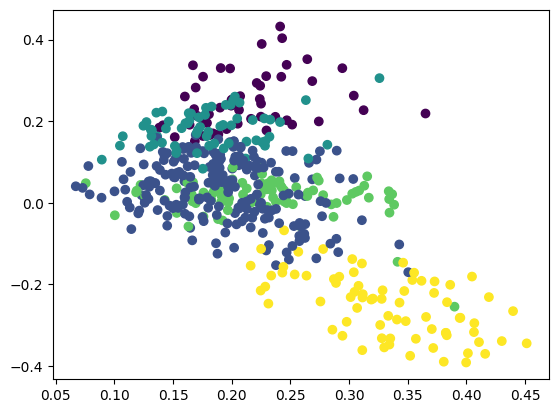

In [161]:
# Create a TruncatedSVD instance with the desired number of components
svd = TruncatedSVD(n_components=4)

# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(small_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=small_df_copy["cluster"])
plt.show()

## Big Dataset

In [164]:
# Define the number of clusters
spectral = SpectralClustering(n_clusters=5, random_state=0)  # Set a random state for reproducibility
spectral.fit(big_df_features)

big_df_copy["cluster"] = spectral.labels_

<ipython-input-164-d7c4d34c76c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy["cluster"] = spectral.labels_


In [168]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(big_df_features, big_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.030637408779787215


In [169]:
# evaluating the ch_score for the small dataset
# to allow it to be used in the calinski_harabasz_score as it doesn't accept sparse
dense_big_df_features = big_df_features.toarray()

ch_score = calinski_harabasz_score(dense_big_df_features, big_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)


Calinski-Harabasz Score: 170.46949581521835


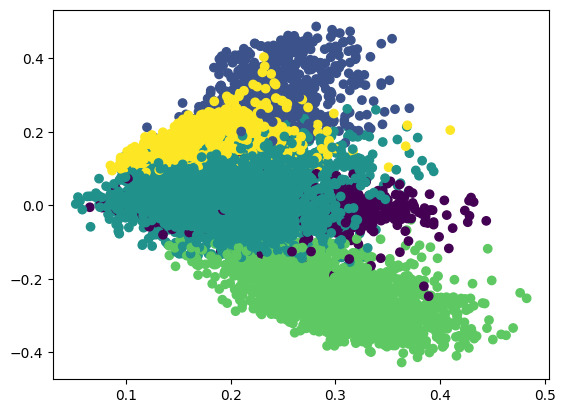

In [170]:
# Create a TruncatedSVD instance with the desired number of components
svd = TruncatedSVD(n_components=4)

# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(big_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=big_df_copy["cluster"])
plt.show()